# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import nltk
import numpy as np
import pickle
import pandas as pd
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.base import BaseEstimator, TransformerMixin # For custom transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline, FeatureUnion

from sqlalchemy import create_engine

nltk.download(['punkt', 'wordnet', 'stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('msg_categories', con = engine)
X = df.message
Y = df.drop(['id', 'message', 'original', 'genre'], axis = 1)

In [3]:
X.head()

0    Weather update - a cold front from Cuba that c...
1              Is the Hurricane over or is it not over
2                      Looking for someone but no name
3    UN reports Leogane 80-90 destroyed. Only Hospi...
4    says: west side of Haiti, rest of the country ...
Name: message, dtype: object

In [4]:
Y.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y[Y.isnull().any(axis = 1)]

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report


### 2. Write a tokenization function to process your text data

Reference: [Bag of Words and TF-IDF practice]()

In [6]:
def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize and remove stop words
    stop_words = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens


### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [7]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer = tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier(), n_jobs = -1))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [8]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Train pipeline
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ob_score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=-1))])

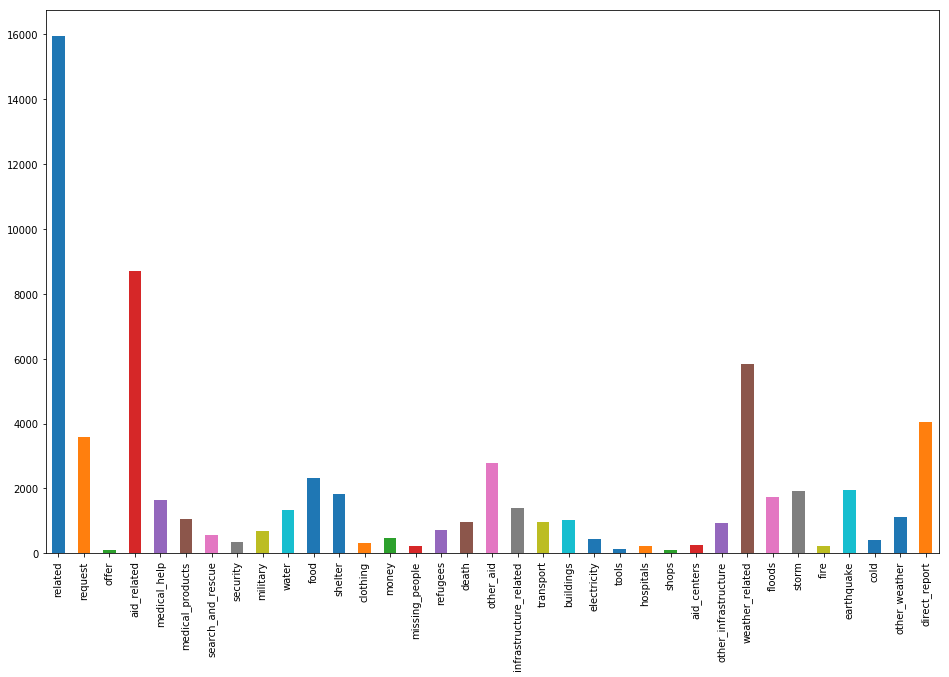

In [11]:
import matplotlib.pyplot as plt

sum = Y_train.sum()
.plot.bar(figsize = (16, 10))
plt.show()

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [10]:
Y_pred = pipeline.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns = Y_train.columns)
Y_pred.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0


In [11]:
for column in Y_pred.columns:
    print('Classification report of {}'.format(column), '\n', classification_report(Y_test[column], Y_pred[column]))

Classification report of related 
              precision    recall  f1-score   support

          0       0.63      0.45      0.53      1868
          1       0.84      0.92      0.88      5941

avg / total       0.79      0.81      0.79      7809

Classification report of request 
              precision    recall  f1-score   support

          0       0.90      0.97      0.93      6476
          1       0.78      0.45      0.57      1333

avg / total       0.88      0.89      0.87      7809

Classification report of offer 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      7775
          1       0.00      0.00      0.00        34

avg / total       0.99      1.00      0.99      7809

Classification report of aid_related 
              precision    recall  f1-score   support

          0       0.75      0.86      0.80      4523
          1       0.75      0.60      0.67      3286

avg / total       0.75      0.75      0.74      7809

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_score_results(y_real, y_pred): 
    
    column_list = y_real.columns
    result = []
    for column in column_list:
        accuracy = accuracy_score(y_real[column], y_pred[column])
        precision = precision_score(y_real[column], y_pred[column], average = 'micro') # default: average = 'binary'
        recall = recall_score(y_real[column], y_pred[column], average = 'micro')
        f1 = f1_score(y_real[column], y_pred[column], average = 'micro')
        
        result.append([accuracy, precision, recall, f1])
        
    result = pd.DataFrame(result, index = column_list, columns = ['Accuracy', 'Precision', 'Recall', 'F1'])
    return result

get_score_results(Y_test, Y_pred)

,Accuracy,Precision,Recall,F1
related,0.805609,0.805609,0.805609,0.805609
request,0.885389,0.885389,0.885389,0.885389
offer,0.995646,0.995646,0.995646,0.995646
aid_related,0.747215,0.747215,0.747215,0.747215
medical_help,0.920348,0.920348,0.920348,0.920348
medical_products,0.951082,0.951082,0.951082,0.951082
search_and_rescue,0.969650,0.969650,0.969650,0.969650
security,0.979767,0.979767,0.979767,0.979767
military,0.966961,0.966961,0.966961,0.966961
water,0.946728,0.946728,0.946728,0.946728


### 6. Improve your model
Use grid search to find better parameters. 

In [15]:
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x7f947a7d7620>, vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
               oob_score=False, random_state=None,

In [20]:
parameters = {'clf__estimator__max_depth': [2, 3, 5],
              'clf__estimator__min_samples_split': [2, 3, 5],
              'clf__estimator__n_estimators': [50, 100]}

from sklearn.metrics import make_scorer
def f1_micro_scorer(y_real, y_pred):
    return f1_score(y_real, y_pred, average = 'micro')

scorer = make_scorer(f1_micro_scorer) # 'f1_macro' # , scoring = scorer
 
cv = GridSearchCV(pipeline, param_grid = parameters, cv = 3, 
                  refit = True, verbose = 5, scoring = 'f1_micro', n_jobs = -1) 


### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [21]:
tuned_model = cv.fit(X_train, Y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=50 
[CV]  clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=50, score=0.3672547076313181, total=  18.5s
[CV] clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=50 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   28.4s remaining:    0.0s


[CV]  clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=50, score=0.36278379117658555, total=  18.3s
[CV] clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=50 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   56.4s remaining:    0.0s


[CV]  clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=50, score=0.3715695952615992, total=  18.3s
[CV] clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=100 


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


[CV]  clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=100, score=0.3672547076313181, total=  24.6s
[CV] clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=100 


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.0min remaining:    0.0s


[CV]  clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=100, score=0.36271981242672924, total=  24.4s
[CV] clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=100 
[CV]  clf__estimator__max_depth=2, clf__estimator__min_samples_split=2, clf__estimator__n_estimators=100, score=0.3716338940219537, total=  24.5s
[CV] clf__estimator__max_depth=2, clf__estimator__min_samples_split=3, clf__estimator__n_estimators=50 
[CV]  clf__estimator__max_depth=2, clf__estimator__min_samples_split=3, clf__estimator__n_estimators=50, score=0.3673841519007413, total=  18.3s
[CV] clf__estimator__max_depth=2, clf__estimator__min_samples_split=3, clf__estimator__n_estimators=50 
[CV]  clf__estimator__max_depth=2, clf__estimator__min_samples_split=3, clf__estimator__n_estimators=50, score=0.36271981242672924, total=  18.3s
[CV] clf__estimator__max_depth=2, clf__estimator__min_samples_split=3, clf__estimator__n_estimators=50 

[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 29.8min finished


In [22]:
tuned_model.cv_results_

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([ 13.3885622 ,  18.54751778,  13.34111349,  18.5170869 ,
         13.26981147,  18.3794175 ,  13.89441125,  19.57557519,
         13.73475289,  19.47303994,  14.00539811,  19.52772133,
         15.09188271,  22.14177974,  14.94739223,  21.66693306,
         15.0219624 ,  21.52204013]),
 'std_fit_time': array([ 0.08281828,  0.11422815,  0.04755186,  0.06576832,  0.04980318,
         0.02636181,  0.11493972,  0.12432084,  0.07230687,  0.01015836,
         0.0999241 ,  0.02353568,  0.02456038,  0.29352128,  0.05705985,
         0.10788403,  0.20804954,  0.02737149]),
 'mean_score_time': array([ 4.98916086,  5.92792336,  4.94280672,  5.90093621,  4.93084971,
         5.89135861,  4.99049465,  5.88958716,  4.93519139,  5.90780512,
         4.9404366 ,  5.93087522,  4.95423897,  5.92675924,  4.92734806,
         5.94266804,  5.03813767,  5.90948145]),
 'std_score_time': array([ 0.04511938,  0.0494507 ,  0.03902261,  0.04181187,  0.03764493,
         0.06295252,  0.073

In [23]:
tuned_model.best_params_

{'clf__estimator__max_depth': 5,
 'clf__estimator__min_samples_split': 2,
 'clf__estimator__n_estimators': 50}

In [25]:
Y_pred_tuned = tuned_model.predict(X_test)
Y_pred_tuned = pd.DataFrame(Y_pred_tuned, columns = Y_train.columns)

get_score_results(Y_test, Y_pred_tuned)

,Accuracy,Precision,Recall,F1
related,0.760789,0.760789,0.760789,0.760789
request,0.829300,0.829300,0.829300,0.829300
offer,0.995646,0.995646,0.995646,0.995646
aid_related,0.584582,0.584582,0.584582,0.584582
medical_help,0.917531,0.917531,0.917531,0.917531
medical_products,0.946984,0.946984,0.946984,0.946984
search_and_rescue,0.969394,0.969394,0.969394,0.969394
security,0.980023,0.980023,0.980023,0.980023
military,0.965809,0.965809,0.965809,0.965809
water,0.934435,0.934435,0.934435,0.934435


In [28]:
print(classification_report(Y_test.values, Y_pred_tuned.values, target_names = Y_train.columns))

                        precision    recall  f1-score   support

               related       0.76      1.00      0.86      5941
               request       0.00      0.00      0.00      1333
                 offer       0.00      0.00      0.00        34
           aid_related       0.94      0.01      0.03      3286
          medical_help       0.00      0.00      0.00       644
      medical_products       0.00      0.00      0.00       414
     search_and_rescue       0.00      0.00      0.00       239
              security       0.00      0.00      0.00       156
              military       0.00      0.00      0.00       267
                 water       0.00      0.00      0.00       512
                  food       0.00      0.00      0.00       878
               shelter       0.00      0.00      0.00       714
              clothing       0.00      0.00      0.00       123
                 money       0.00      0.00      0.00       192
        missing_people       0.00      

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
print(accuracy_score(Y_test.values, Y_pred_tuned.values))

0.187988218722


In [30]:
print(classification_report(Y_test.values, Y_pred.values, target_names = Y_train.columns))

                        precision    recall  f1-score   support

               related       0.84      0.92      0.88      5941
               request       0.78      0.45      0.57      1333
                 offer       0.00      0.00      0.00        34
           aid_related       0.75      0.60      0.67      3286
          medical_help       0.67      0.07      0.12       644
      medical_products       0.77      0.11      0.19       414
     search_and_rescue       0.55      0.05      0.08       239
              security       0.00      0.00      0.00       156
              military       0.60      0.10      0.17       267
                 water       0.86      0.22      0.35       512
                  food       0.81      0.55      0.65       878
               shelter       0.78      0.31      0.45       714
              clothing       0.67      0.08      0.14       123
                 money       0.62      0.04      0.08       192
        missing_people       1.00      

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
print(accuracy_score(Y_test.values, Y_pred.values))

0.237546420797


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

In [26]:
filename = 'ML_pipeline_tunedmodel.pkl'
pickle.dump(tuned_model, open(filename, 'wb')) 

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.